In [1]:
#Dependencies Setup and Data Preparation
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = [
    Path("Resources/World_Health_Organization/WHO_AAP_2021_v9_2022_08_11.csv")
]
who_air_qual = pd.read_csv(file_path[0])
column_PM25 = "PM2.5 (μg/m3)"
column_PM10 = "PM10 (μg/m3)"
column_NO2 = "NO2 (μg/m3)"
column_reference = "Reference"
who_air_qual.dropna(subset=[column_PM25,column_NO2,column_reference], inplace=True)

who_aq_dropped = who_air_qual.drop(columns=["PM25 temporal coverage (%)", "PM10 temporal coverage (%)", "Number and type of monitoring stations","Version of the database","Status","NO2 temporal coverage (%)"]) \
                             .reset_index(drop=True) \
                             .rename(columns={"ISO3":"Country Code", "City or Locality":"Location", "Measurement Year":"Year"})

who_aq_dropped


,WHO Region,Country Code,WHO Country Name,Location,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),Reference
0,European Region,ALB,Albania,Vrith,2015,13.24,19.52,9.57,European Environment Agency (downloaded in 2021)
1,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,European Environment Agency (downloaded in 2021)
2,European Region,ALB,Albania,Korce,2016,28.64,40.21,12.52,European Environment Agency (downloaded in 2021)
3,Western Pacific Region,AUS,Australia,Adelaide,2012,7.30,16.53,8.93,EPA South Australia
4,Western Pacific Region,AUS,Australia,Palmerston,2012,12.00,25.90,7.00,NEPM
...,...,...,...,...,...,...,...,...,...
8893,Region of the Americas,USA,United States of America,Santa Maria-Santa Barbara (Ca),2019,4.80,14.80,3.45,Environmental Protection Agency
8894,Region of the Americas,USA,United States of America,Stockton-Lodi (Ca),2019,9.30,26.35,15.55,Environmental Protection Agency
8895,Region of the Americas,USA,United States of America,Tucson (Az),2019,3.45,18.24,13.90,Environmental Protection Agency
8896,Region of the Americas,USA,United States of America,Urban Honolulu (Hi),2019,3.00,11.83,7.60,Environmental Protection Agency


In [2]:
#Checking for missing values
print(who_aq_dropped.isnull().sum())

WHO Region             0
Country Code           0
WHO Country Name       0
Location               0
Year                   0
PM2.5 (μg/m3)          0
PM10 (μg/m3)        1460
NO2 (μg/m3)            0
Reference              0
dtype: int64


In [3]:
#Dropping the missing values
who_aq_dropped = who_aq_dropped.dropna()

# Print the count of null values after dropping
print(who_aq_dropped.isnull().sum())

WHO Region          0
Country Code        0
WHO Country Name    0
Location            0
Year                0
PM2.5 (μg/m3)       0
PM10 (μg/m3)        0
NO2 (μg/m3)         0
Reference           0
dtype: int64


In [4]:
#Counting the number of unique regions, countries and cities

num_regions = who_aq_dropped["WHO Region"].nunique()
print("Number of WHO Regions: ", num_regions)
num_countries = who_aq_dropped["WHO Country Name"].nunique()
print("Number of Countries: ", num_countries)
num_cities = who_aq_dropped["Location"].nunique()
print("Number of Cities: ", num_cities)


Number of WHO Regions:  6
Number of Countries:  65
Number of Cities:  1719


In [5]:
#Data Exploration - Basic Statistics and Skewness
pm25_mean = who_aq_dropped[column_PM25].mean()
pm25_median = who_aq_dropped[column_PM25].median()
pm25_mode = who_aq_dropped[column_PM25].value_counts().idxmax()
pm25_skewness = who_aq_dropped[column_PM25].skew()
pm25_min = who_aq_dropped[column_PM25].min()  
pm25_max = who_aq_dropped[column_PM25].max()  

pm10_mean = who_aq_dropped[column_PM10].mean()
pm10_median = who_aq_dropped[column_PM10].median()
pm10_mode = who_aq_dropped[column_PM10].value_counts().idxmax()
pm10_skewness = who_aq_dropped[column_PM10].skew()
pm10_min = who_aq_dropped[column_PM10].min()  
pm10_max = who_aq_dropped[column_PM10].max()  

no2_mean = who_aq_dropped[column_NO2].mean()
no2_median = who_aq_dropped[column_NO2].median()
no2_mode = who_aq_dropped[column_NO2].value_counts().idxmax()
no2_skewness = who_aq_dropped[column_NO2].skew()
no2_min = who_aq_dropped[column_NO2].min()
no2_max = who_aq_dropped[column_NO2].max()  

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "PM10": {
        "Mean": pm10_mean,
        "Median": pm10_median,
        "Mode": pm10_mode,
        "Min": pm10_min,
        "Max": pm10_max,
        "Skewness": pm10_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,PM10,NO2
Mean,16.13,28.33,21.75
Median,13.25,21.65,20.88
Mode,23.00,44.00,14.00
Min,0.01,2.17,0.35
Max,132.00,276.11,112.52
Skewness,3.56,4.05,0.93


In [6]:
# Group by 'WHO Country Name' and 'Year' and calculate the mean values for PM2.5, PM10, and NO2
average_values_by_country_year = who_aq_dropped.groupby(['WHO Country Name', 'Year']).agg({
    column_PM25: 'mean',
    column_PM10: 'mean',
    column_NO2: 'mean'
}).reset_index()

average_values_by_country_year


,WHO Country Name,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
0,Albania,2015,13.240000,19.520000,9.570000
1,Albania,2016,21.480000,32.385000,18.650000
2,Australia,2012,9.650000,21.215000,7.965000
3,Australia,2013,7.586000,18.536000,12.176000
4,Australia,2014,8.134286,19.457143,11.102857
...,...,...,...,...,...
396,United States of America,2015,9.454545,24.676818,16.840909
397,United States of America,2016,8.366667,21.708000,16.091333
398,United States of America,2017,9.858824,25.363529,16.961765
399,United States of America,2018,10.077727,25.212727,14.898182


In [8]:
# Identifying outliers for PM2.5 (μg/m3)
pm25_data = average_values_by_country_year['PM2.5 (μg/m3)']

quartiles = pm25_data.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)

outliers = pm25_data[(pm25_data < lower_bound) | (pm25_data > upper_bound)]

print("Potential outliers for PM2.5 (μg/m3):")
print(len(outliers))

Potential outliers for PM2.5 (μg/m3):
31


In [9]:
# Identifying outliers for PM10 (μg/m3)
pm10_data = average_values_by_country_year['PM10 (μg/m3)']

quartiles = pm10_data.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)

outliers = pm10_data[(pm10_data < lower_bound) | (pm10_data > upper_bound)]

print("Potential outliers for PM10 (μg/m3):")
print(len(outliers))

Potential outliers for PM10 (μg/m3):
39


In [10]:
# Removing outliers and storing results in a new DataFrame
filtered_data = average_values_by_country_year.copy()

for column in average_values_by_country_year.columns:
    if average_values_by_country_year[column].dtype != 'object': 
        quartiles = average_values_by_country_year[column].quantile([0.25, 0.5, 0.75])
        lower_quartile = quartiles[0.25]
        upper_quartile = quartiles[0.75]
        iqr = upper_quartile - lower_quartile

        lower_bound = lower_quartile - (1.5 * iqr)
        upper_bound = upper_quartile + (1.5 * iqr)

        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]

print("Number of outliers removed for each column:")
print(average_values_by_country_year.shape[0] - filtered_data.shape[0])

print("\nNew DataFrame with outliers removed:")
filtered_data

Number of outliers removed for each column:
56

New DataFrame with outliers removed:


,WHO Country Name,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
0,Albania,2015,13.240000,19.520000,9.570000
1,Albania,2016,21.480000,32.385000,18.650000
2,Australia,2012,9.650000,21.215000,7.965000
3,Australia,2013,7.586000,18.536000,12.176000
4,Australia,2014,8.134286,19.457143,11.102857
...,...,...,...,...,...
396,United States of America,2015,9.454545,24.676818,16.840909
397,United States of America,2016,8.366667,21.708000,16.091333
398,United States of America,2017,9.858824,25.363529,16.961765
399,United States of America,2018,10.077727,25.212727,14.898182


In [11]:
#Data Exploration - Basic Statistics and Skewness
pm25_mean = filtered_data[column_PM25].mean()
pm25_median = filtered_data[column_PM25].median()
pm25_mode = filtered_data[column_PM25].value_counts().idxmax()
pm25_skewness = filtered_data[column_PM25].skew()
pm25_min = filtered_data[column_PM25].min()  
pm25_max = filtered_data[column_PM25].max()  

pm10_mean = filtered_data[column_PM10].mean()
pm10_median = filtered_data[column_PM10].median()
pm10_mode = filtered_data[column_PM10].value_counts().idxmax()
pm10_skewness = filtered_data[column_PM10].skew()
pm10_min = filtered_data[column_PM10].min()  
pm10_max = filtered_data[column_PM10].max()  

no2_mean = filtered_data[column_NO2].mean()
no2_median = filtered_data[column_NO2].median()
no2_mode = filtered_data[column_NO2].value_counts().idxmax()
no2_skewness = filtered_data[column_NO2].skew()
no2_min = filtered_data[column_NO2].min()
no2_max = filtered_data[column_NO2].max()  

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "PM10": {
        "Mean": pm10_mean,
        "Median": pm10_median,
        "Mode": pm10_mode,
        "Min": pm10_min,
        "Max": pm10_max,
        "Skewness": pm10_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,PM10,NO2
Mean,14.74,26.80,20.76
Median,13.62,23.46,20.25
Mode,15.00,22.03,23.82
Min,3.99,7.44,4.80
Max,39.40,67.98,40.71
Skewness,0.90,1.26,0.21


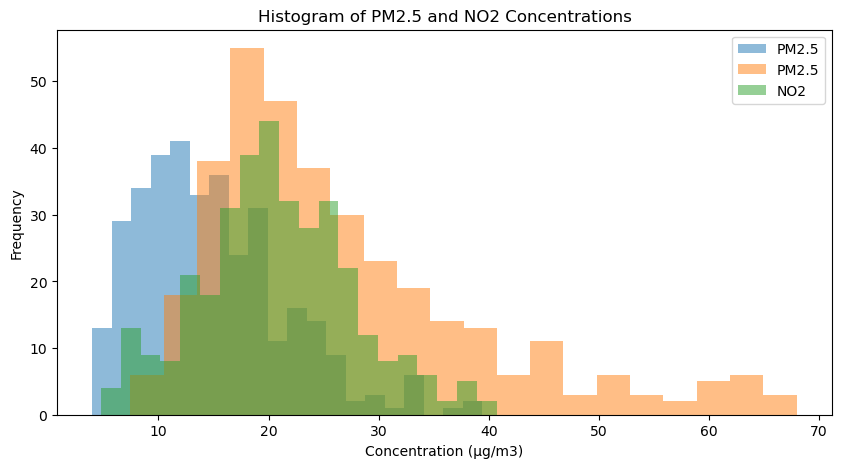

In [12]:
#Examination of data for normal distribution
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.hist(filtered_data[column_PM25], bins=20, alpha=0.5, label='PM2.5')
plt.hist(filtered_data[column_PM10], bins=20, alpha=0.5, label='PM2.5')
plt.hist(filtered_data[column_NO2], bins=20, alpha=0.5, label='NO2')
plt.xlabel('Concentration (μg/m3)')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 and NO2 Concentrations')
plt.legend()
plt.show()

In [13]:
#Average Polluntants by Country Per Year
avg_PM25_byregion_year = who_aq_dropped.groupby(["WHO Region", "Year"])[column_PM25].mean().round(2)
avg_PM10_byregion_year = who_aq_dropped.groupby(["WHO Region", "Year"])[column_PM10].mean().round(2)
avg_NO2_byregion_year = who_aq_dropped.groupby(["WHO Region", "Year"])[column_NO2].mean().round(2)


avgpollutant_summary_by_regionyear = pd.DataFrame({
    "Average PM2.5 Concentration": avg_PM25_byregion_year,
    "Average PM10 Concentration": avg_PM10_byregion_year,
    "Average NO2 Concentration": avg_NO2_byregion_year,
})

avgpollutant_summary_by_regionyear


Average PM2.5 Concentration  \
WHO Region                   Year                                
African Region               2010                        38.53   
                             2011                        47.82   
                             2012                        29.67   
                             2013                        24.29   
                             2014                        22.26   
                             2015                        19.65   
                             2016                        25.23   
                             2017                        16.16   
                             2018                        23.73   
                             2019                        18.65   
                             2020                        21.23   
                             2021                        21.70   
Eastern Mediterranean Region 2012                        30.92   
                             2013                        45.89   
                             2014                        25.99   
                             2015                        47.33   
                             2016                        30.46   
                             2017                        55.86   
                             2018                        51.53   
                             2019                        40.38   
                             2020                        37.96   
European Region              2010                        16.80   
                             2011                        14.58   
                             2012                        12.73   
                             2013                        15.34   
                             2014                        14.20   
                             2015                        14.11   
                             2016                        13.42   
                             2017                        13.71   
                             2018                        13.37   
                             2019                        11.95   
                             2020                         9.01   
Region of the Americas       2010                        18.48   
                             2011                        18.99   
                             2012                        14.77   
                             2013                        17.36   
                             2014                        18.40   
                             2015                        14.45   
                             2016                        13.08   
                             2017                         9.89   
                             2018                        13.01   
                             2019                        10.27   
South East Asia Region       2013                        76.25   
                             2014                        77.17   
                             2015                        71.88   
                             2016                        39.07   
                             2017                        39.99   
                             2018                        44.80   
                             2019                        37.99   
Western Pacific Region       2011                       132.00   
                             2012                        41.77   
                             2013                        30.71   
                             2014                        22.25   
                             2015                        28.11   
                             2016                        25.93   
                             2017                        21.15   
                             2018                        20.15   
                             2019                        17.20   
                             2020                        18.41   

        

In [14]:
#Average Polluntants by Country Per Year
avg_PM25_bycountry_year = who_aq_dropped.groupby(["WHO Country Name", "Year"])[column_PM25].mean().round(2)
avg_PM10_bycountry_year = who_aq_dropped.groupby(["WHO Country Name", "Year"])[column_PM10].mean().round(2)
avg_NO2_bycountry_year = who_aq_dropped.groupby(["WHO Country Name", "Year"])[column_NO2].mean().round(2)


avgpollutant_summary_by_year = pd.DataFrame({
    "Average PM2.5 Concentration": avg_PM25_bycountry_year,
    "Average PM10 Concentration": avg_PM10_bycountry_year,
    "Average NO2 Concentration": avg_NO2_bycountry_year,
})

avgpollutant_summary_by_year



Average PM2.5 Concentration  \
WHO Country Name         Year                                
Albania                  2015                        13.24   
                         2016                        21.48   
Australia                2012                         9.65   
                         2013                         7.59   
                         2014                         8.13   
...                                                    ...   
United States of America 2015                         9.45   
                         2016                         8.37   
                         2017                         9.86   
                         2018                        10.08   
                         2019                         7.86   

                               Average PM10 Concentration  \
WHO Country Name         Year                               
Albania                  2015                       19.52   
                         2016                       32.38   
Australia                2012                       21.22   
                         2013                       18.54   
                         2014                       19.46   
...                                                   ...   
United States of America 2015                       24.68   
                         2016                       21.71   
                         2017                       25.36   
                         2018                       25.21   
                         2019                       22.38   

                               Average NO2 Concentration  
WHO Country Name         Year                             
Albania                  2015                       9.57  
                         2016                      18.65  
Australia                2012                       7.96  
                         2013                      12.18  
                         2014                      11.10  
...                                                  ...  
United States of America 2015                      16.84  
                         2016                      16.09  
                         2017                      16.96  
                         2018                      14.90  
                         2019                      15.38  

[401 rows x 3 columns]

In [15]:
#Highest Concentration of Pollutants by Country/Year
top_polluted_country = avgpollutant_summary_by_year.sort_values(by='Average PM2.5 Concentration', ascending=False)
top_polluted_country.head(5)

Average PM2.5 Concentration  \
WHO Country Name Year                                
Mongolia         2011                       132.00   
                 2012                       106.00   
China            2013                       105.00   
Bangladesh       2015                        78.17   
                 2014                        77.17   

                       Average PM10 Concentration  Average NO2 Concentration  
WHO Country Name Year                                                         
Mongolia         2011                      232.00                      49.00  
                 2012                      253.00                      50.00  
China            2013                      190.00                      57.00  
Bangladesh       2015                      129.01                      40.14  
                 2014                      148.50                      37.40

In [16]:
#Lowest Concentration of Pollutants by Country/Year
bottom_polluted_country = avgpollutant_summary_by_year.sort_values(by='Average PM2.5 Concentration', ascending=False)
bottom_polluted_country.tail(5)

Average PM2.5 Concentration  \
WHO Country Name Year                                
Estonia          2019                         4.72   
Finland          2017                         4.71   
Iceland          2014                         4.64   
                 2018                         4.33   
                 2019                         3.99   

                       Average PM10 Concentration  Average NO2 Concentration  
WHO Country Name Year                                                         
Estonia          2019                       10.87                       6.82  
Finland          2017                       11.28                      15.96  
Iceland          2014                        6.03                       1.00  
                 2018                        8.55                       6.57  
                 2019                        7.44                       5.55

In [17]:
output_csv_path ="Resources/World_Health_Organization/Air_Quality_Data_WHO.csv"
filtered_data.to_csv(output_csv_path, index=False)